| Task| Student | Teacher | Date| 
|----------|----------|----------|--------|
|Pseudo Object Detection Code Correction| Lovisa Nguyen | Toni Aaltonen |11/23|

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt


def ORB_detector(new_image, image_template):
    
    edges = cv.Canny(image_template,100,200)
    
    orb = cv2.ORB_create(1000, 1.2)  # ORB detector of 1000 keypoints, scaling pyramid factor=1.2
    (kp1, des1) = orb.detectAndCompute(new_image, None)  # Detect keypoints on the new image
    (kp2, des2) = orb.detectAndCompute(edges, None)  # Detect keypoints of the template image
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)  # Matcher
    matches = bf.match(des1, des2)  # Extract matches
    matches = sorted(matches, key=lambda x: x.distance)  # Sort matches
    img2 = cv2.drawKeypoints(edges, kp2, None, color=(0,255,0), flags=0)
    img1 = cv2.drawKeypoints(new_image, kp2, None, color=(0,255,0), flags=0)
    plt.imshow(img2)
    plt.show()
    return len(matches)

# Load video file and template image
cap = cv2.VideoCapture("HethenHisPelivideo.mp4")
image_template = cv2.imread('HisPelivideo.png', 0)

# Initialize ROI coordinates
top_left_x, top_left_y, bottom_right_x, bottom_right_y = 0, 0, 0, 0

while (cap.isOpened()):
    # Get video frame
    ret, frame = cap.read()

    # Check if the video frame was captured successfully
    if not ret:
        print("Error: Could not read frame.")
        break

    # Convert frame to grayscale for ORB detector
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Get number of ORB matches
    matches = ORB_detector(gray_frame, image_template)

    # Display status string showing the current number of matches
    output_string = "Matches = " + str(matches)
    cv2.putText(frame, output_string, (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 2)

    # Our threshold to indicate object detection
    threshold = 250

    # If matches exceed our threshold then object has been detected
    if matches > threshold:
        # Perform template matching to get the location of the detected object
        result = cv2.matchTemplate(gray_frame, image_template, cv2.TM_CCOEFF_NORMED)
        _, _, _, max_loc = cv2.minMaxLoc(result)
        top_left_x, top_left_y = max_loc
        bottom_right_x = top_left_x + image_template.shape[1]
        bottom_right_y = top_left_y + image_template.shape[0]
        
        # Resize the frame region to match the detected object's size
        detected_object_width = (bottom_right_x - top_left_x)/2
        detected_object_height = (bottom_right_y - top_left_x)/2
        # Update the top-left and bottom-right coordinates of the detection frame
        detection_frame_width = detected_object_width
        detection_frame_height = detected_object_height
        # Draw a rectangle around the detected object with the resized frame size
        cv2.rectangle(frame, (int(top_left_x), int(top_left_y)),
                      (int(top_left_x + detection_frame_width), int(top_left_y + detection_frame_height)),
                      (0, 255, 0), 3)
        cv2.putText(frame, 'Object Found', (50, 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 2)

    # Display the frame with the detected object
    cv2.imshow('Object Detector using ORB', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()

In [43]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import argparse

def ORB_detector(new_image, image_template):
    orb = cv2.ORB_create(1000, 1.2)  # ORB detector of 1000 keypoints, scaling pyramid factor=1.2
    (kp1, des1) = orb.detectAndCompute(new_image, None)  # Detect keypoints on the new image
    (kp2, des2) = orb.detectAndCompute(image_template, None)  # Detect keypoints of the template image
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)  # Matcher
    matches = bf.match(des1, des2)  # Extract matches
    matches = sorted(matches, key=lambda val: val.distance)  # Sort matches
    img2 = cv2.drawKeypoints(image_template, kp2, None, color=(0,255,0), flags=0)
    img1 = cv2.drawKeypoints(new_image, kp2, None, color=(0,255,0), flags=0)
    plt.imshow(img2)
    plt.show()
    return len(matches)

parser = argparse.ArgumentParser()
parser.add_argument('-i', '--input', help='path to the input video',
                    required=True)
parser.add_argument('-c', '--consecutive-frames', default=4, type=int,
                    dest='consecutive_frames', help='path to the input video')
args = vars(parser.parse_args())
frame_count = 0
consecutive_frame = args['consecutive_frames']
# Load video file and template image
cap = cv2.VideoCapture("HethenHisPelivideo.mp4")
image_template = cv2.imread('Pelivideo.png', 0)

# Initialize ROI coordinates
top_left_x, top_left_y, bottom_right_x, bottom_right_y = 0, 0, 0, 0

while (cap.isOpened()):
    frame_count = 0
    consecutive_frame = args['consecutive_frames']
    # Get video frame
    ret, frame = cap.read()
    
    if ret == True:
        frame_count += 1
        orig_frame = frame.copy()
        # IMPORTANT STEP: convert the frame to grayscale first
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        if frame_count % consecutive_frame == 0 or frame_count == 1:
            frame_diff_list = []
        # find the difference between current frame and base frame
        frame_diff = cv2.absdiff(gray, background)
        # thresholding to convert the frame to binary
        ret, thres = cv2.threshold(frame_diff, 50, 255, cv2.THRESH_BINARY)
        # dilate the frame a bit to get some more white area...
        # ... makes the detection of contours a bit easier
        dilate_frame = cv2.dilate(thres, None, iterations=2)
        # append the final result into the `frame_diff_list`
        frame_diff_list.append(dilate_frame)
        # if we have reached `consecutive_frame` number of frames
        if len(frame_diff_list) == consecutive_frame:
            # add all the frames in the `frame_diff_list`
            sum_frames = sum(frame_diff_list)
            # find the contours around the white segmented areas
            contours, hierarchy = cv2.findContours(sum_frames, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            # draw the contours, not strictly necessary
            for i, cnt in enumerate(contours):
                cv2.drawContours(frame, contours, i, (0, 0, 255), 3)
            for contour in contours:
                # continue through the loop if contour area is less than 500...
                # ... helps in removing noise detection
                if cv2.contourArea(contour) < 500:
                    continue
                # get the xmin, ymin, width, and height coordinates from the contours
                (x, y, w, h) = cv2.boundingRect(contour)
                # draw the bounding boxes
                cv2.rectangle(orig_frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
            cv2.imshow('Detected Objects', orig_frame)
            out.write(orig_frame)
            if cv2.waitKey(100) & 0xFF == ord('q'):
                break
    else:
        break
cap.release()
cv2.destroyAllWindows()

usage: ipykernel_launcher.py [-h] -i INPUT [-c CONSECUTIVE_FRAMES]
ipykernel_launcher.py: error: the following arguments are required: -i/--input


SystemExit: 2

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3452: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


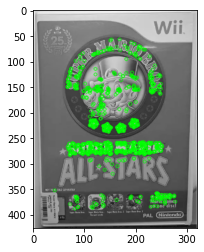

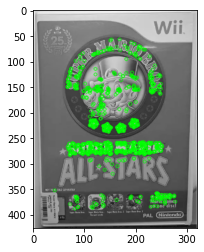

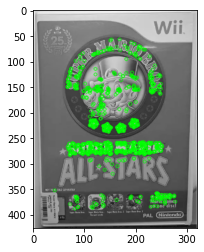

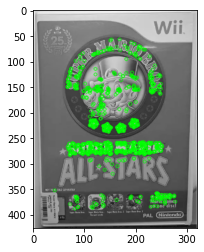

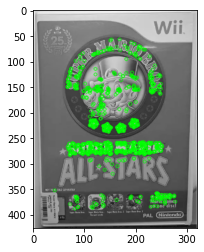

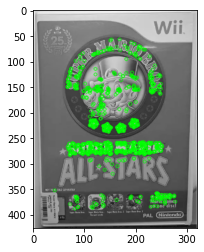

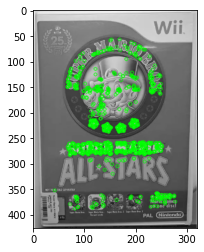

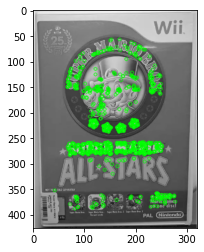

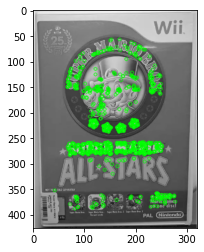

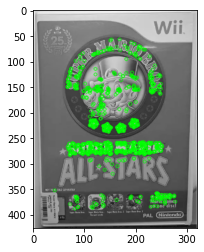

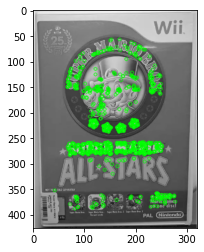

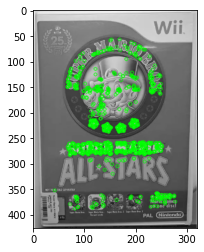

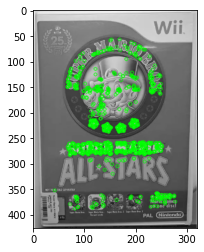

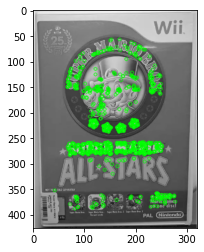

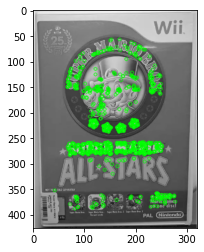

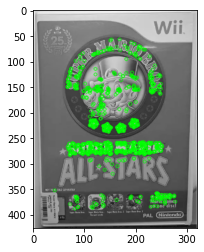

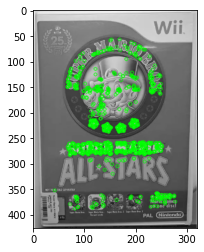

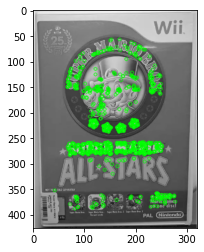

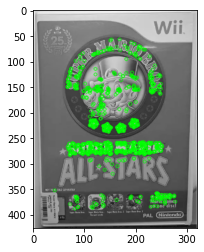

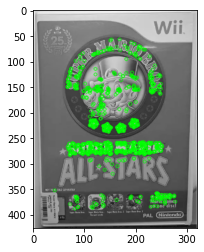

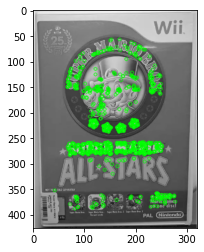

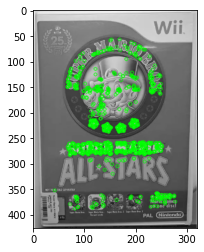

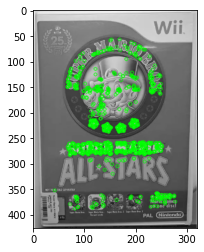

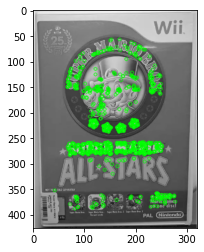

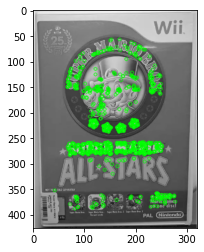

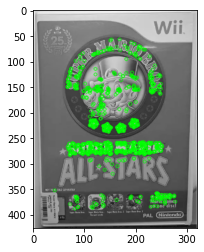

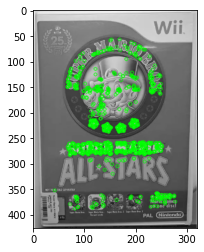

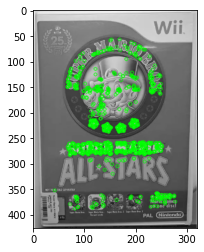

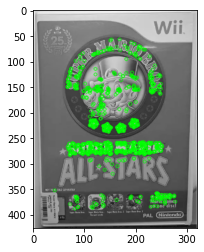

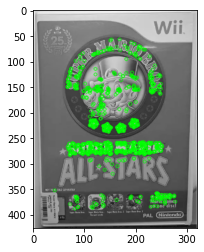

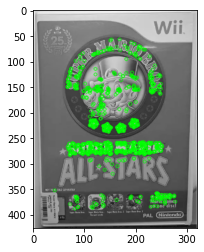

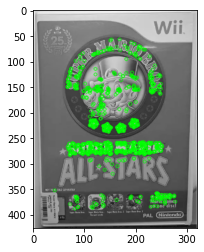

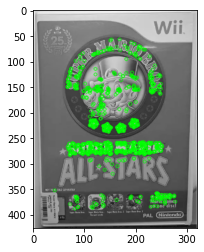

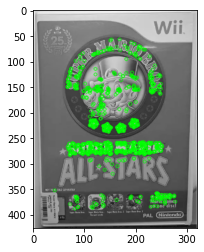

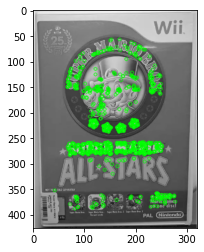

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


def ORB_detector(new_image, image_template):
    orb = cv2.ORB_create(1000, 1.2)  # ORB detector of 1000 keypoints, scaling pyramid factor=1.2
    (kp1, des1) = orb.detectAndCompute(new_image, None)  # Detect keypoints on the new image
    (kp2, des2) = orb.detectAndCompute(image_template, None)  # Detect keypoints of the template image
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)  # Matcher
    matches = bf.match(des1, des2)  # Extract matches
    matches = sorted(matches, key=lambda val: val.distance)  # Sort matches
    img2 = cv2.drawKeypoints(image_template, kp2, None, color=(0,255,0), flags=0)
    img1 = cv2.drawKeypoints(new_image, kp2, None, color=(0,255,0), flags=0)
    plt.imshow(img2)
    plt.show()
    return len(matches)

# Load video file and template image
cap = cv2.VideoCapture("HethenHisPelivideo.mp4")
image_template = cv2.imread('Pelivideo.png', 0)

# Initialize ROI coordinates
top_left_x, top_left_y, bottom_right_x, bottom_right_y = 0, 0, 0, 0

while (cap.isOpened()):
    # Get video frame
    ret, frame = cap.read()

    # Check if the video frame was captured successfully
    if not ret:
        print("Error: Could not read frame.")
        break

    # Convert frame to grayscale for ORB detector
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Get number of ORB matches
    matches = ORB_detector(gray_frame, image_template)

    # Display status string showing the current number of matches
    output_string = "Matches = " + str(matches)
    cv2.putText(frame, output_string, (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 2)

    # Our threshold to indicate object detection
    threshold = 250

    # If matches exceed our threshold then object has been detected
    if matches > threshold:
        # Perform template matching to get the location of the detected object
        result = cv2.matchTemplate(gray_frame, image_template, cv2.TM_CCOEFF_NORMED)
        _, _, _, max_loc = cv2.minMaxLoc(result)
        top_left_x, top_left_y = max_loc
        bottom_right_x = top_left_x + image_template.shape[1]
        bottom_right_y = top_left_y + image_template.shape[0]
        
        # Extract the Region of Interest (ROI) where the object is located
        roi = gray_frame[top_left_y:bottom_right_y, top_left_x:bottom_right_x]

        # Find contours in the ROI
        contours, _ = cv2.findContours(roi, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Draw contours around the object
        cv2.drawContours(frame, contours, -1, (0, 255, 0), 2)

        # Display the frame with contours around the object
        cv2.imshow('Object Detection with Contours', frame)
        
        # Resize the frame region to match the detected object's size
        detected_object_width = (bottom_right_x - top_left_x)/2
        detected_object_height = (bottom_right_y - top_left_x)/2
        # Update the top-left and bottom-right coordinates of the detection frame
        detection_frame_width = detected_object_width
        detection_frame_height = detected_object_height
        # Draw a rectangle around the detected object with the resized frame size
        cv2.rectangle(frame, (int(top_left_x), int(top_left_y)),
                      (int(top_left_x + detection_frame_width), int(top_left_y + detection_frame_height)),
                      (0, 255, 0), 3)
        cv2.putText(frame, 'Object Found', (50, 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 2)

    # Display the frame with the detected object
    cv2.imshow('Object Detector using ORB', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()